In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading raw MMIJ data for 1 boom with sonic anemometer

In [56]:
rawdata = pd.read_csv('mmij-meteo-raw-2012-01-01.csv',sep=';',skiprows=[0,2],parse_dates=True,index_col=0,
                      usecols=['Timestamp','MMIJ_H85B0_WsXSon_Q1','MMIJ_H85B0_WsYSon_Q1','MMIJ_H85B0_WsZSon_Q1'])
rawdata.head()

,MMIJ_H85B0_WsXSon_Q1,MMIJ_H85B0_WsYSon_Q1,MMIJ_H85B0_WsZSon_Q1
Timestamp,,,
2012-01-01 00:00:00,11.65,-0.04,0.71
2012-01-01 00:00:00,10.98,0.07,0.39
2012-01-01 00:00:00,10.65,1.01,0.48
2012-01-01 00:00:00,10.32,0.54,0.05
2012-01-01 00:00:01,10.78,0.37,-0.20


## Computing (co)variances, TKE and u\* at 10min intervals

In [54]:
rawdata.columns = ['u','v','w']
rawdata.head()
covariances = rawdata.groupby(pd.TimeGrouper(freq='10min')).cov().unstack()

# Rename the columns
dirs = ["u'","v'","w'"]
covariances.columns = [x+y for x in dirs for y in dirs]

# Removing redundant columns
covariances.drop(["v'u'","w'u'","w'v'"],axis=1,inplace=True)

# Computing TKE and ust
covariances['TKE'] = (covariances["u'u'"]+covariances["v'v'"]+covariances["w'w'"])/2.
covariances['ust'] = (covariances["u'w'"]**2+covariances["v'w'"]**2)**.25

covariances.head()

,u'u',u'v',u'w',v'v',v'w',w'w',TKE,ust
Timestamp,,,,,,,,
2012-01-01 00:00:00,1.280784,-0.428444,0.223690,0.417141,-0.090026,0.225768,0.961847,0.491046
2012-01-01 00:10:00,1.875975,-0.467605,0.240030,0.314066,-0.044658,0.279817,1.234929,0.494114
2012-01-01 00:20:00,1.496071,-0.385349,0.220063,0.301582,-0.072661,0.233357,1.015505,0.481403
2012-01-01 00:30:00,1.589465,-0.540510,0.404786,0.526537,-0.173720,0.313768,1.214885,0.663694
2012-01-01 00:40:00,1.432732,-0.443949,0.327598,0.422216,-0.110998,0.248970,1.051959,0.588125


## Inspecting results

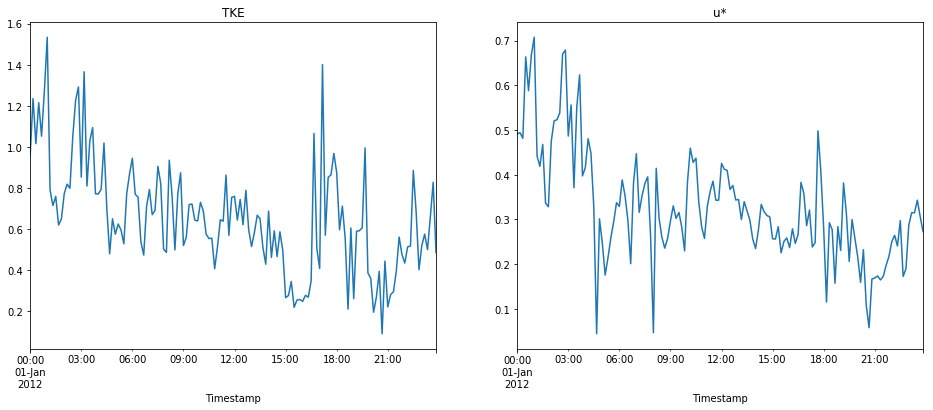

In [61]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
covariances.TKE.plot(ax=ax[0]); ax[0].set_title('TKE')
covariances.ust.plot(ax=ax[1]); ax[1].set_title('u*')
plt.show()

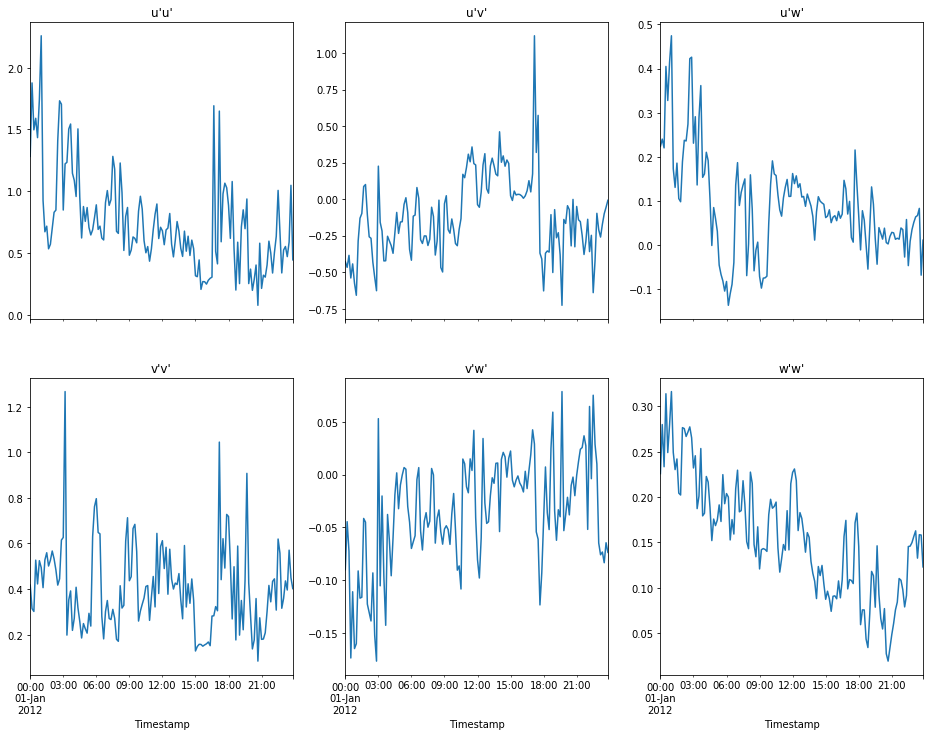

In [65]:
fig,ax=plt.subplots(2,3,figsize=(16,12),sharex=True)
covariances["u'u'"].plot(ax=ax[0,0]); ax[0,0].set_title("u'u'")
covariances["u'v'"].plot(ax=ax[0,1]); ax[0,1].set_title("u'v'")
covariances["u'w'"].plot(ax=ax[0,2]); ax[0,2].set_title("u'w'")
covariances["v'v'"].plot(ax=ax[1,0]); ax[1,0].set_title("v'v'")
covariances["v'w'"].plot(ax=ax[1,1]); ax[1,1].set_title("v'w'")
covariances["w'w'"].plot(ax=ax[1,2]); ax[1,2].set_title("w'w'")
plt.show()